<a href="https://colab.research.google.com/github/jeonggyunH/jeonggyunH/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
%matplotlib inline
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from numpy.random import randn
from matplotlib import pyplot
data = pd.read_csv('/content/allcombGan3.csv')
# data = pd.read_csv('/Iris.csv')
print (data.shape)
print (data.tail())
print (data.columns)


(1870, 5)
       press     rr          zz      ne  output
1865  1.3332  225.0   59.536967  10.500       0
1866  1.3332  225.0   66.150019   6.430       1
1867  1.3332  225.0   66.150019  11.700       0
1868  1.3332  225.0  108.000000   5.630       1
1869  1.3332  225.0  108.000000  -0.418       0
Index(['press', 'rr', 'zz', 'ne', 'output'], dtype='object')


In [89]:
data.columns

Index(['press', 'rr', 'zz', 'ne', 'output'], dtype='object')

In [90]:

data.isnull().sum()

press     0
rr        0
zz        0
ne        0
output    0
dtype: int64

In [91]:
data.shape

(1870, 5)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   press   1870 non-null   float64
 1   rr      1870 non-null   float64
 2   zz      1870 non-null   float64
 3   ne      1870 non-null   float64
 4   output  1870 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 73.2 KB


In [93]:
features = ['press', 'rr', 'zz', 'ne']

label = ['output']
X = data[features]
y = data[label]
print (y)

      output
0          1
1          0
2          1
3          0
4          1
...      ...
1865       0
1866       1
1867       0
1868       1
1869       0

[1870 rows x 1 columns]


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_true_train,y_true_train)

y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:",metrics.classification_report(y_true_test, y_true_pred))
 

<ipython-input-94-dff20d8bb866>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_true.fit(X_true_train,y_true_train)


Base Accuracy: 0.24955436720142601
Base classification report:               precision    recall  f1-score   support

           0       0.25      0.25      0.25       277
           1       0.25      0.25      0.25       284

    accuracy                           0.25       561
   macro avg       0.25      0.25      0.25       561
weighted avg       0.25      0.25      0.25       561



In [95]:

X.shape

(1870, 4)

In [96]:

data.shape

(1870, 5)

In [97]:
print (y_true_test)

      output
1701       0
1489       0
921        0
275        0
416        1
...      ...
1700       1
236        1
551        0
1746       1
1379       0

[561 rows x 1 columns]


In [98]:

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

  # use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = np.zeros((n_samples, 1))
	return X, y

  # generate n real samples with class labels
def generate_real_samples(n):
  X = data.sample(n)

  #generate class labels
  y = np.ones((n, 1))
  return X, y

  # define the standalone generator model
def define_generator(latent_dim, n_outputs=5):
  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(30, activation='relu'))
  # model.add(Dense(n_outputs, activation='sigmoid'))
  model.add(Dense(n_outputs, activation='linear'))
  return model

In [99]:
generator1 = define_generator(10, 5)
generator1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 15)                165       
                                                                 
 dense_64 (Dense)            (None, 30)                480       
                                                                 
 dense_65 (Dense)            (None, 5)                 155       
                                                                 
Total params: 800
Trainable params: 800
Non-trainable params: 0
_________________________________________________________________


In [100]:
# from keras.layers import Reshape
# from keras.layers import Flatten
# from keras.layers import Conv2D
# from keras.layers import Conv2DTranspose
# from keras.layers import LeakyReLU
# from keras.layers import BatchNormalization
# from keras.initializers import RandomNormal
# from matplotlib import pyplot

In [101]:
# define the standalone discriminator model
def define_discriminator(n_inputs=5):
  model = Sequential()
  # model.add(Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer='he_uniform', input_shape=n_inputs))
  # model.add(BatchNormalization())
  # model.add(LeakyReLU(alpha=0.2))
  # model.add(Dense(25, activation='relu'))
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [102]:
discriminator1 = define_discriminator(5)
discriminator1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 25)                150       
                                                                 
 dense_67 (Dense)            (None, 50)                1300      
                                                                 
 dense_68 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [103]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [104]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
	# plot loss
	plt.subplot(1, 1, 1)
	plt.plot(d_hist, label='d')
	plt.plot(g_hist, label='gen')
	# plt.legend()
	# plot discriminator accuracy
	# pyplot.subplot(2, 1, 2)
	# pyplot.plot(a1_hist, label='acc-real')
	# pyplot.plot(a2_hist, label='acc-fake')
	plt.show()
	# save plot to file
	# plt.savefig('results_baseline/plot_line_plot_loss.png')
	plt.close()

In [105]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
  
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)

  d_history = []
  g_history = []
  
  # manually enumerate epochs
  for epoch in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
    d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    
    # update the generator via the discriminator's error
    g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

    print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    d_history.append(d_loss)
    g_history.append(g_loss_fake)

  plot_history(d_history, g_history)

    # if i==999:
    #   np.savetxt("new_X.csv", X, delimiter=",")
    
    # evaluate the model every n_eval epochs
    # if (i+1) % n_eval == 0:
    #   summarize_performance(i, g_model, d_model, latent_dim)
  g_model.save('trained_generated_model_20210205_v3.h5')

In [106]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
  # scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], color='red')
	pyplot.scatter(x_fake[:, 0], color='blue')
	pyplot.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2/2 [==============================] - 0s 4ms/step
>7501, d1=0.497, d2=0.873 d=0.685 g=1.960
2/2 [==============================] - 0s 4ms/step
>7502, d1=0.969, d2=0.356 d=0.663 g=2.052
2/2 [==============================] - 0s 3ms/step
>7503, d1=1.179, d2=0.620 d=0.899 g=0.996
2/2 [==============================] - 0s 5ms/step
>7504, d1=0.564, d2=1.161 d=0.863 g=1.076
2/2 [==============================] - 0s 4ms/step
>7505, d1=0.646, d2=0.600 d=0.623 g=2.094
2/2 [==============================] - 0s 4ms/step
>7506, d1=1.873, d2=0.630 d=1.251 g=0.814
2/2 [==============================] - 0s 6ms/step
>7507, d1=0.485, d2=1.501 d=0.993 g=0.965
2/2 [==============================] - 0s 3ms/step
>7508, d1=0.733, d2=0.902 d=0.818 g=1.719
2/2 [==============================] - 0s 4ms/step
>7509, d1=1.350, d2=0.386 d=0.868 g=1.359
2/2 [==============================] - 0s 4ms/step
>7510, d1=1.131, d2=1.174 d=1.152 g=0.998
2/2 [=============================

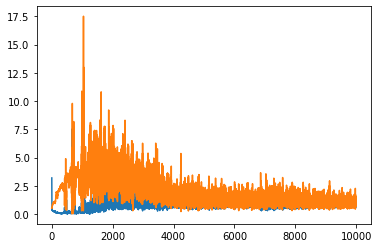

In [107]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [108]:
from keras.models import load_model
model = load_model('/content/trained_generated_model_20210205_v3.h5')
 

In [109]:
latent_points = generate_latent_points(10, 1870)
X = model.predict(latent_points)
data_fake = pd.DataFrame(data=X,  columns=['press', 'rr', 'zz', 'ne', 'output'])
data_fake.head(1870)

59/59 [==============================] - 0s 2ms/step


,press,rr,zz,ne,output
0,1.026123,86.249283,0.961794,21.422483,-0.102770
1,0.845192,27.871819,110.130653,612.469727,-0.976076
2,1.328191,106.885025,1.630150,39.790417,-0.135645
3,0.260946,7.428370,147.299454,1200.209961,-1.990292
4,0.993197,-0.001031,25.206808,291.477997,-0.336574
...,...,...,...,...,...
1865,0.391588,135.732620,92.796173,17.501755,-0.558438
1866,1.907338,13.684664,1.828377,30.782133,0.323730
1867,0.465596,-8.074123,194.076263,792.243530,-0.936154
1868,1.437483,26.202753,21.280426,573.257996,-0.906105


In [110]:
data_fake.output.min()

-3.651048

In [111]:
data_fake.output.max()

0.39928612

In [112]:
outcome_mean = data_fake.output.mean()

In [113]:
data_fake['output'] = data_fake['output'] > outcome_mean

In [114]:
data_fake['output']

0        True
1       False
2        True
3       False
4        True
        ...  
1865    False
1866     True
1867    False
1868    False
1869    False
Name: output, Length: 1870, dtype: bool

In [115]:
data_fake["output"] = data_fake["output"].astype(int)

In [116]:
data_fake.head(1870)

,press,rr,zz,ne,output
0,1.026123,86.249283,0.961794,21.422483,1
1,0.845192,27.871819,110.130653,612.469727,0
2,1.328191,106.885025,1.630150,39.790417,1
3,0.260946,7.428370,147.299454,1200.209961,0
4,0.993197,-0.001031,25.206808,291.477997,1
...,...,...,...,...,...
1865,0.391588,135.732620,92.796173,17.501755,0
1866,1.907338,13.684664,1.828377,30.782133,1
1867,0.465596,-8.074123,194.076263,792.243530,0
1868,1.437483,26.202753,21.280426,573.257996,0


In [117]:
features = ['press', 'rr', 'zz', 'ne', 'output']

label = ['output']
X_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [118]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(X_fake_train,y_fake_train)

y_fake_pred=clf_fake.predict(X_fake_test)
print("Accuracy of fake data model:",metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model:",metrics.classification_report(y_fake_test, y_fake_pred))


<ipython-input-118-1f74263594f9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_fake.fit(X_fake_train,y_fake_train)


Accuracy of fake data model: 1.0
Classification report of fake data model:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       348

    accuracy                           1.00       561
   macro avg       1.00      1.00      1.00       561
weighted avg       1.00      1.00      1.00       561



In [119]:
X_final = X[:, :4]
print ('X_final: ', X_final[:3])

y_final = X[:, :]
print ('y_final: ', y_final[:3])

X_final:  [[  1.026123    86.24928      0.96179366  21.422483  ]
 [  0.84519243  27.871819   110.13065    612.4697    ]
 [  1.3281913  106.885025     1.6301503   39.790417  ]]
y_final:  [[ 1.02612305e+00  8.62492828e+01  9.61793661e-01  2.14224834e+01
  -1.02770306e-01]
 [ 8.45192432e-01  2.78718185e+01  1.10130653e+02  6.12469727e+02
  -9.76076186e-01]
 [ 1.32819128e+00  1.06885025e+02  1.63015032e+00  3.97904167e+01
  -1.35645181e-01]]


In [120]:
X = X [:,:4]
y_fake_pred = clf_true.predict(X)
y_fake_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, ..., 1, 0, 0])

In [121]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 37.1 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [122]:
data_fake.shape

(1870, 5)

In [123]:
data.shape

(1870, 5)

In [124]:
data_fake.head(3028)

,press,rr,zz,ne,output
0,1.026123,86.249283,0.961794,21.422483,1
1,0.845192,27.871819,110.130653,612.469727,0
2,1.328191,106.885025,1.630150,39.790417,1
3,0.260946,7.428370,147.299454,1200.209961,0
4,0.993197,-0.001031,25.206808,291.477997,1
...,...,...,...,...,...
1865,0.391588,135.732620,92.796173,17.501755,0
1866,1.907338,13.684664,1.828377,30.782133,1
1867,0.465596,-8.074123,194.076263,792.243530,0
1868,1.437483,26.202753,21.280426,573.257996,0


In [125]:
data.head(1870)

,press,rr,zz,ne,output
0,1.3332,0.0,0.000000,7.050,1
1,1.3332,0.0,0.000000,2.700,0
2,1.3332,0.0,0.258390,10.800,1
3,1.3332,0.0,0.258390,8.630,0
4,1.3332,0.0,0.620137,18.000,1
...,...,...,...,...,...
1865,1.3332,225.0,59.536967,10.500,0
1866,1.3332,225.0,66.150019,6.430,1
1867,1.3332,225.0,66.150019,11.700,0
1868,1.3332,225.0,108.000000,5.630,1


In [127]:
from table_evaluator import load_data, TableEvaluator

In [128]:
table_evaluator = TableEvaluator(data, data_fake)

In [129]:
table_evaluator.evaluate(target_col='output')

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.4893   0.9572              0.3333
DecisionTreeClassifier_real   0.2861   0.5348              0.3192
LogisticRegression_fake       0.4813   0.9305              0.3357
LogisticRegression_real       0.4679   0.5134              0.2487
MLPClassifier_fake            0.4465   0.9358              0.2571
MLPClassifier_real            0.4545   0.5027              0.2593
RandomForestClassifier_fake   0.4305   0.9519              0.2657
RandomForestClassifier_real   0.2487   0.5241              0.3333

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.6150
nearest neighbor std                     0.3107

Miscellaneous results:
                                  Result
Column Cor

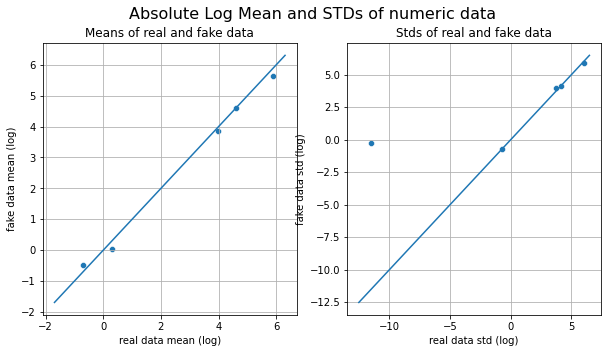

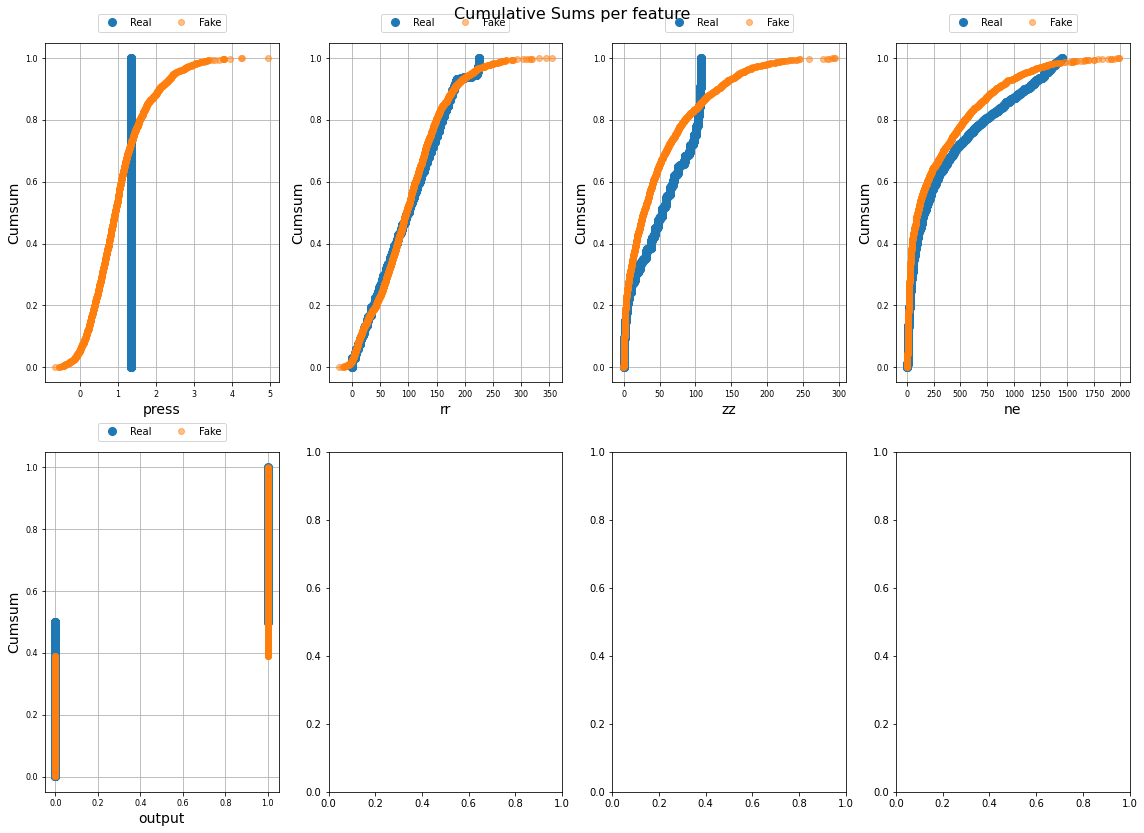

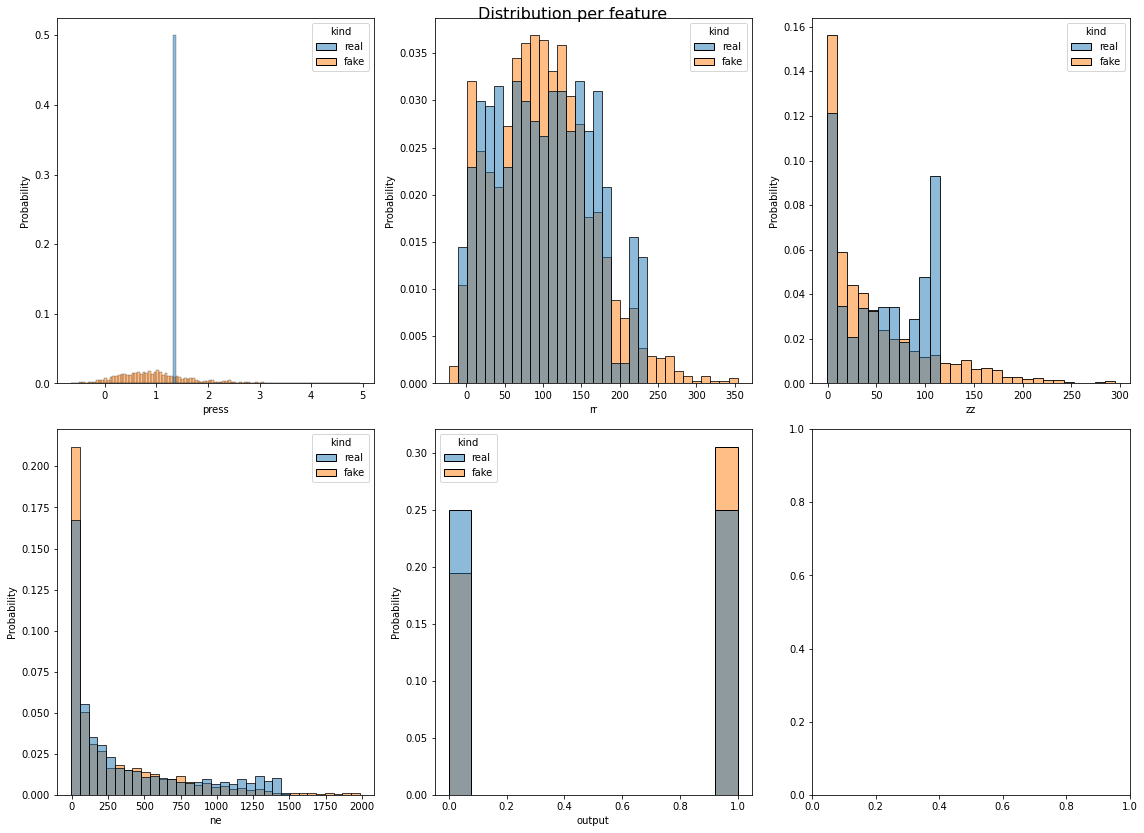

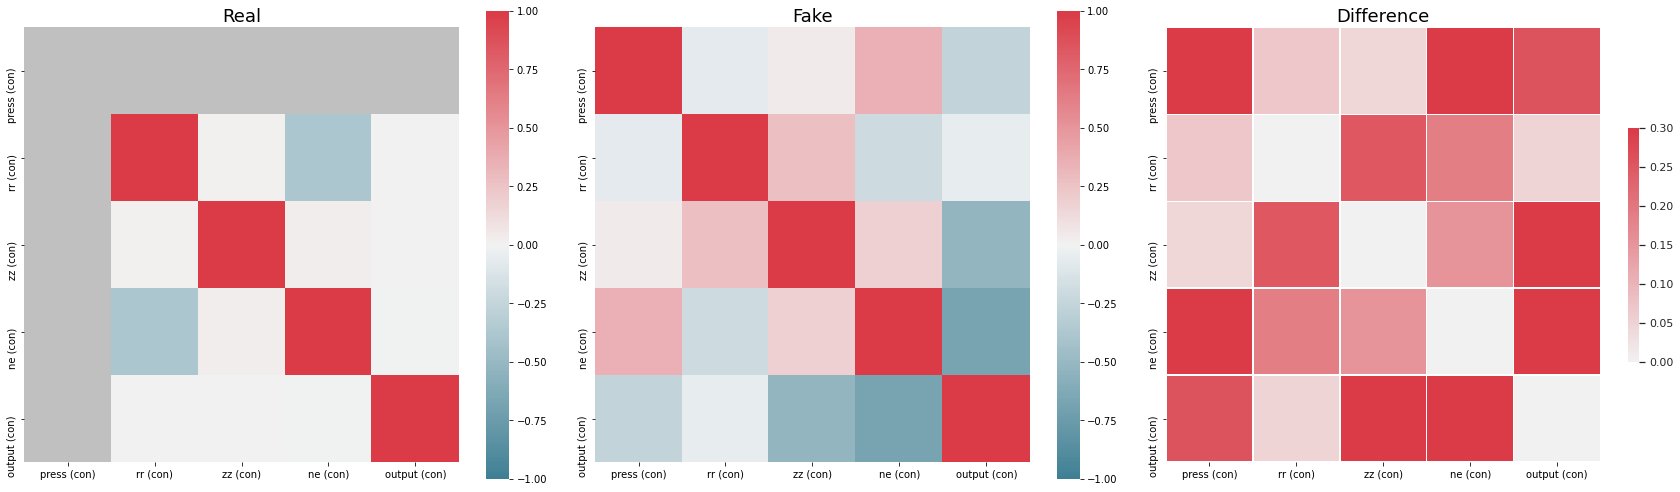

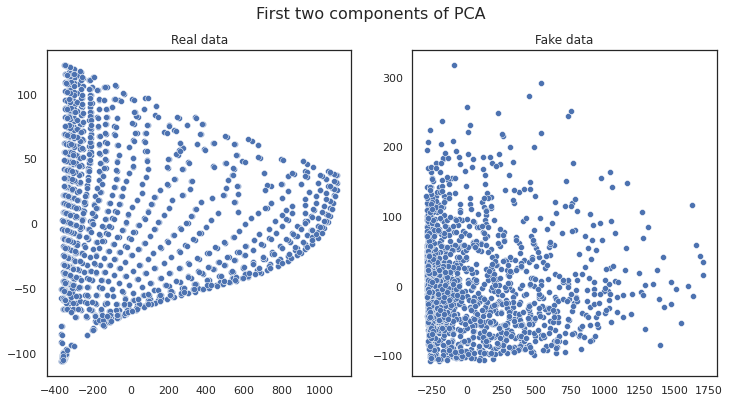

In [130]:
table_evaluator.visual_evaluation()